In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 2.66MB/s]


In [4]:
import pandas as pd                             #importing the required libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [9]:
# working with the dataset
customer_data = pd.read_csv('/content/customer-segmentation-tutorial-in-python.zip')
print(customer_data)
customer_data.head()

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
customer_data.isnull().sum()    #checking if there are any null values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
x_data = customer_data.drop(columns =['CustomerID','Gender','Age'],axis=1).values  # we are dropping these columns because we are not interested in these
# we are going cluster using Annual Income and Spending Score

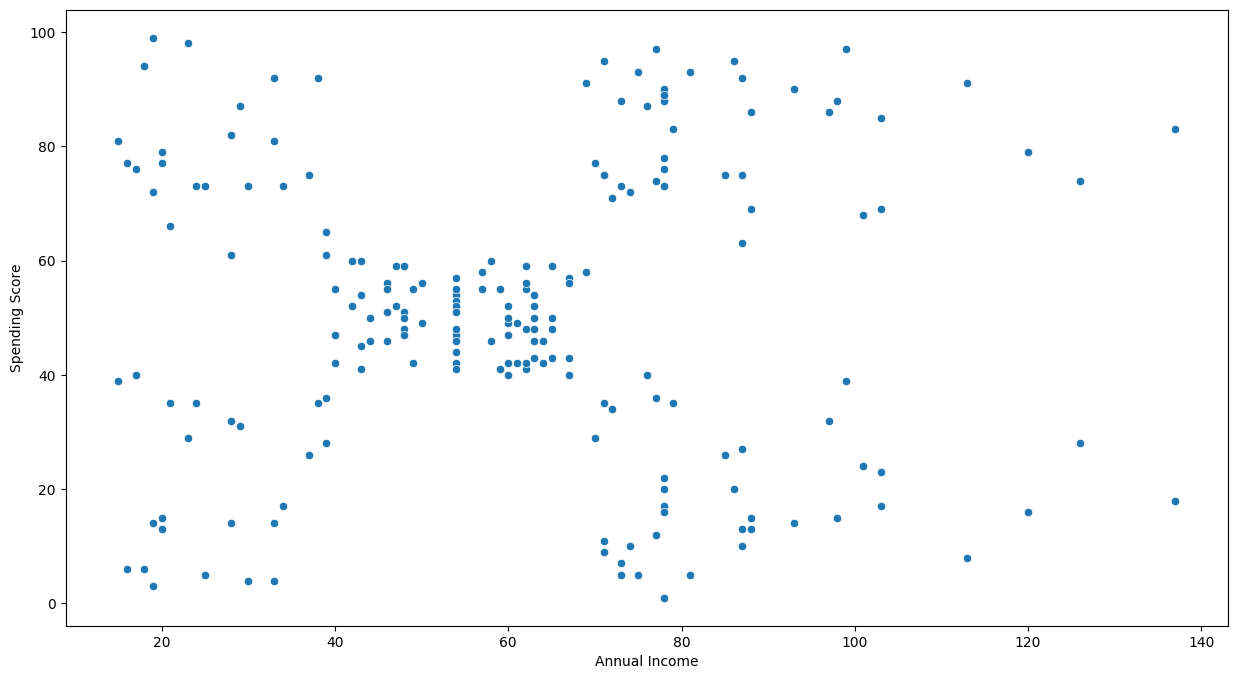

<function matplotlib.pyplot.show(close=None, block=None)>

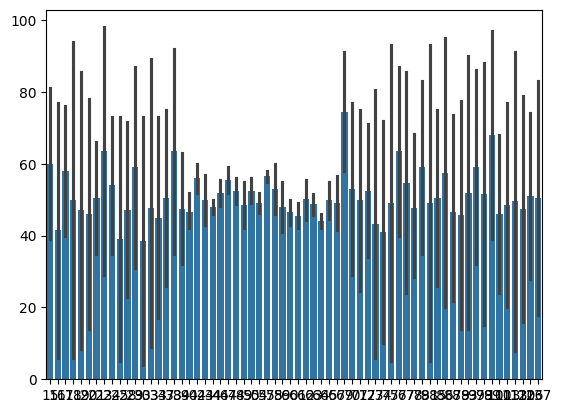

In [16]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=x_data[:,0],y=x_data[:,1])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')                       # just visualizing using scatterplot and barplot
plt.show()
sns.barplot(x=x_data[:,0],y=x_data[:,1])
plt.show

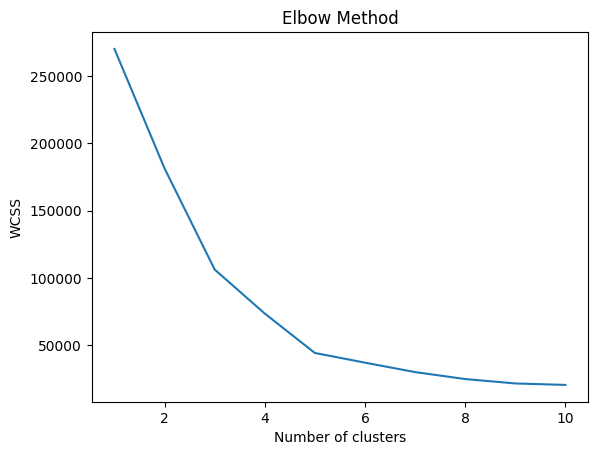

In [17]:
# The Elbow method to find the K value for clustering

wcss = []  # Within-cluster sum of squares

for i in range(1, 11):  # Trying k values from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_data)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [26]:
# from the above graph we can assume that the elbow point is approximately 5. i.e by fitting the data with 5 clusters we can have better approximation

#training the K-means algorithm on the dataset

kmeans= KMeans(n_clusters = 5,init = 'k-means++',random_state=0)
Y = kmeans.fit_predict(x_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
#Centroid points

kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

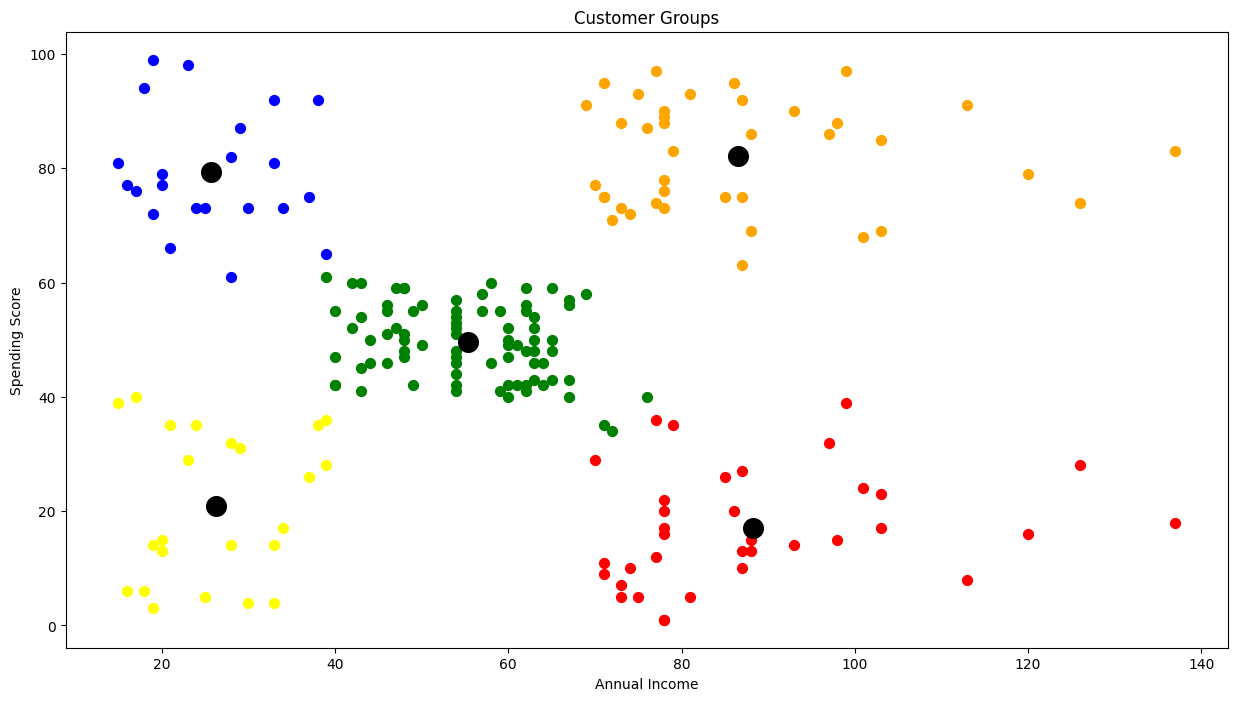

In [27]:
plt.figure(figsize=(15,8))
plt.scatter( x= x_data[Y==0,0], y=x_data[Y==0,1], s=50, c='red', label='Cluster 1')
plt.scatter(x_data[Y==1,0], x_data[Y==1,1], s=50, c='green', label='Cluster 2')
plt.scatter(x_data[Y==2,0], x_data[Y==2,1], s=50, c='orange', label='Cluster 3')
plt.scatter(x_data[Y==3,0], x_data[Y==3,1], s=50, c='blue', label='Cluster 4')
plt.scatter(x_data[Y==4,0], x_data[Y==4,1], s=50, c='yellow', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],  kmeans.cluster_centers_[:,1], s=200 ,c='black', label= 'Cluster centroid')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()